In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problema: Saúde em fetos
Um hospital com médicos muito qualificados quer usar esse conhecimento pra lugares de mais difícil acesso

### Variáveis  
 - baseline_value: Frequência de batimento cardíaco basal
 - accelerations: Quantidade de acelerações por segundo
 - fetal_movementm: Quantidade de movimentos do feto por segundo
 - uterine_contractions: Quantidade de contrações uterinas por segundo
 - light_decelerations: Quantidade de desacelerações leves por segundo
 - severe_decelerations: Quantidade de desacelerações severas por segundo
 - prolongued_decelerations: Quantidade de desacelerações prolongadas por segundo
 - abnormal_short_term_variability: Porcentual do tempo com variabilidades rápidas anormais
 - mean_value_of_short_term_variability: Média das variabilidades rápidas
 - percentage_of_time_with_abnormal_long_term_variability: Porcentual do tempo com variabilidades longas anormais
 - mean_value_of_long_term_variability: Média das variabilidades longas
 - histogram_width: Largura do histograma do ultrassom
 - histogram_min: Menor valor do histograma
 - histogram_max: Maior valor do histograma
 - histogram_number_of_peaks: Quantidade de picos no histograma
 - histogram_number_of_zeroes: Quantidade de vales no histograma
 - histogram_mode: Moda do Histograma
 - histogram_mean: Média do histograma
 - histogram_median: Mediana do histograma
 - histogram_variance: Variância do histograma
 - histogram_tendency: Tendência do Histograma

### Variável resposta
 - fetal_health: Fetal health: 1 - Normal 2 - Suspeito 3 - Doente

In [4]:
df = pd.read_csv('../../DataSets/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Entendimento dos dados

# Tratamentos dos dados

# Separação em variáveis preditivas e variável resposta

In [5]:
X = df.drop('fetal_health', axis=1)
y = df.fetal_health

In [6]:
y.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [7]:
y.value_counts() / y.shape[0]

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

# Divisão em treino e teste

In [8]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.30)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)

In [10]:
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

# Score multiclasse

In [11]:
rf.predict_proba(X_ts)

array([[9.64690043e-01, 3.49038165e-02, 4.06140264e-04],
       [9.90454655e-01, 9.01092090e-03, 5.34424499e-04],
       [9.68649129e-01, 2.62239075e-02, 5.12696362e-03],
       ...,
       [6.63827395e-02, 8.96432381e-01, 3.71848798e-02],
       [9.84926799e-01, 1.29053824e-02, 2.16781843e-03],
       [9.66380344e-01, 2.48731050e-02, 8.74655086e-03]])

In [12]:
pd.DataFrame(rf.predict_proba(X_ts), columns=[
    'Score saudável',
    'Score suspeito',
    'Score doente'
])

,Score saudável,Score suspeito,Score doente
0,0.964690,0.034904,0.000406
1,0.990455,0.009011,0.000534
2,0.968649,0.026224,0.005127
3,0.682993,0.302906,0.014101
4,0.026122,0.018437,0.955441
...,...,...,...
633,0.994251,0.004924,0.000826
634,0.903774,0.087623,0.008604
635,0.066383,0.896432,0.037185
636,0.984927,0.012905,0.002168


In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_ts==1, rf.predict_proba(X_ts)[:,0])

0.9803990173453436

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_ts==2, rf.predict_proba(X_ts)[:,1])

0.9642059355387725

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_ts==3, rf.predict_proba(X_ts)[:,2])

0.9954449152542373

# Como comparar histogramas: 
## 1) Colocar na mesma escala
## 2) Colocar no mesmo gráfico
## 3) Melhorar o visual

Text(0.5, 1.0, 'Score saudável')

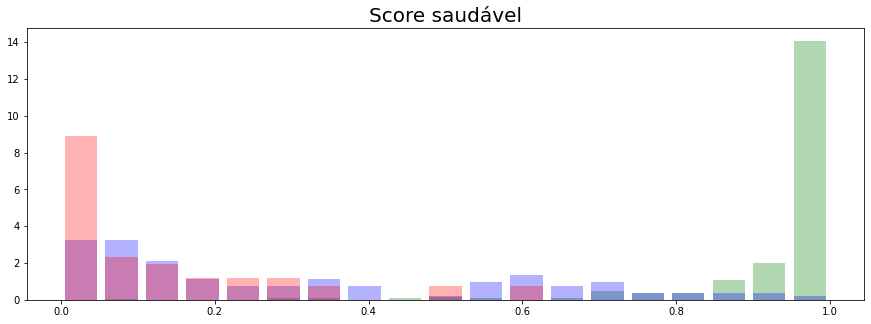

In [19]:
pred_saudavel = rf.predict_proba(X_ts)[:,0]
pred_suspeito = rf.predict_proba(X_ts)[:,1]
pred_doente   = rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_saudavel[y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_saudavel[y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Score saudável', fontsize=20)

Text(0.5, 1.0, 'Score suspeito')

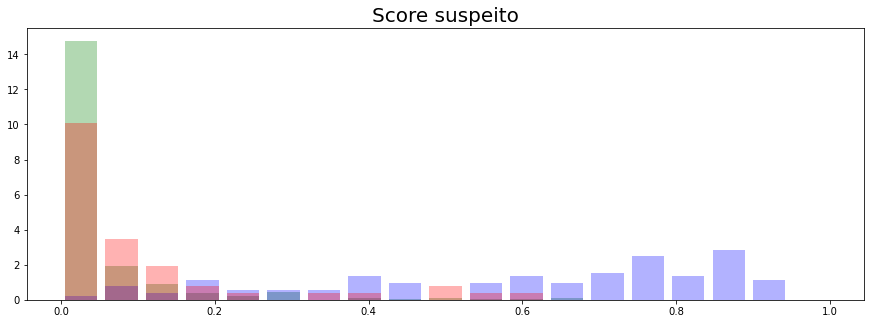

In [20]:
pred_saudavel = rf.predict_proba(X_ts)[:,0]
pred_suspeito = rf.predict_proba(X_ts)[:,1]
pred_doente   = rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_suspeito[y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito[y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito[y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Score suspeito', fontsize=20)

Text(0.5, 1.0, 'Score doente')

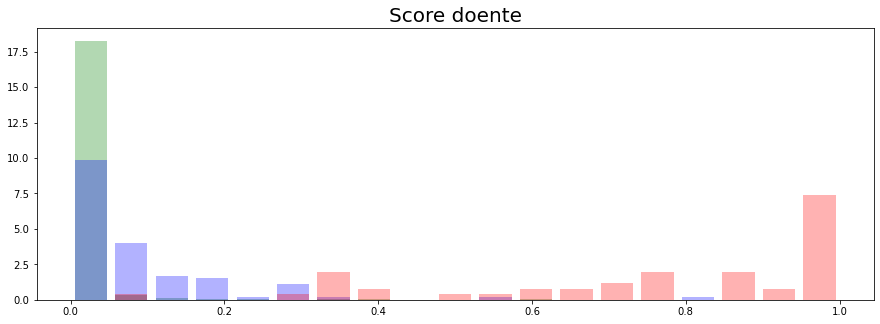

In [21]:
pred_saudavel = rf.predict_proba(X_ts)[:,0]
pred_suspeito = rf.predict_proba(X_ts)[:,1]
pred_doente   = rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_doente[y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_doente[y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_doente[y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Score doente', fontsize=20)

Text(0.5, 1.0, 'Público saudável')

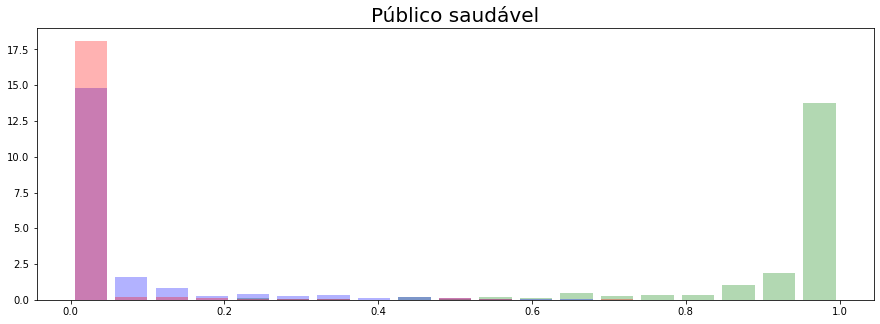

In [16]:
pred_saudavel = rf.predict_proba(X_ts)[:,0]
pred_suspeito = rf.predict_proba(X_ts)[:,1]
pred_doente   = rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_ts==1], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito[y_ts==1], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_doente[y_ts==1], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Público saudável', fontsize=20)

Text(0.5, 1.0, 'Público suspeito')

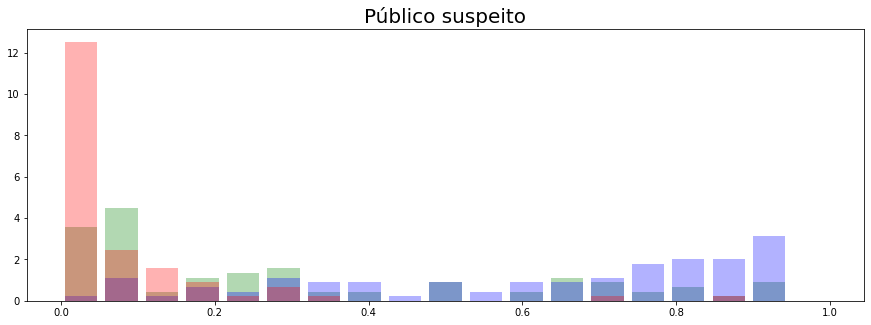

In [17]:
pred_saudavel = rf.predict_proba(X_ts)[:,0]
pred_suspeito = rf.predict_proba(X_ts)[:,1]
pred_doente   = rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_ts==2], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito[y_ts==2], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_doente[y_ts==2], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Público suspeito', fontsize=20)

Text(0.5, 1.0, 'Público doente')

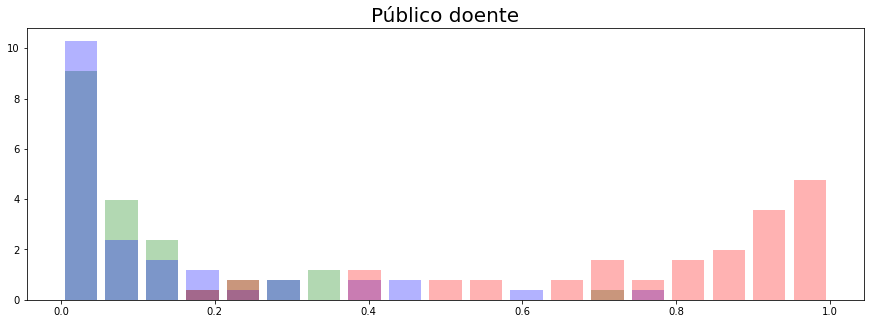

In [18]:
pred_saudavel = rf.predict_proba(X_ts)[:,0]
pred_suspeito = rf.predict_proba(X_ts)[:,1]
pred_doente   = rf.predict_proba(X_ts)[:,2]

bins = np.linspace(0,1,20)

plt.figure(figsize=(15,5))
plt.hist(pred_saudavel[y_ts==3], bins=bins, density=True, color='g', alpha=.3, rwidth=.8)
plt.hist(pred_suspeito[y_ts==3], bins=bins, density=True, color='b', alpha=.3, rwidth=.8)
plt.hist(pred_doente[y_ts==3], bins=bins, density=True, color='r', alpha=.3, rwidth=.8)

plt.title('Público doente', fontsize=20)